# Искусственные нейронные сети
# Сеть на numpy

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

(1797, 64)


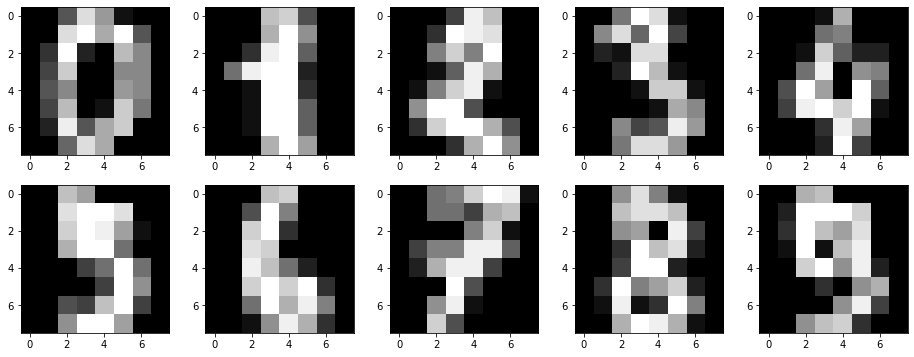

In [118]:
# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]), cmap='gray')

In [119]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [120]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [121]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21 )
X_train.shape, X_test.shape

((1203, 64), (594, 64))

## Пример построения  двухслойной нейронной сети на numpy <a class='anchor' id='example2'>

In [122]:
X_train.shape

(1203, 64)

In [123]:
# Обучение нейронной сети на различных комбинациях параметров

neuron_numb_list = [15, 20, 30, 50, 100]
learning_rate_list = [0.001, 0.1, 0.01, 0.05, 0.2, 0.5, 1]
num_epochs_list = [5, 10, 50, 100, 200, 500]

params_list = []
metrics_train = []
metrics_test = []

for neur_num in neuron_numb_list:
    for l_rate in learning_rate_list:
        for n_epoch in num_epochs_list:

            # определим число нейронов скрытого слоя
            neuron_numb = neur_num 
            
            # присваивание случайных весов
            np.random.seed(1)
            w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
            w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

            # скорость обучения (learning rate)
            learning_rate = l_rate
            
            # количество итераций
            num_epochs = n_epoch

            # процесс обучения
            for i in range(num_epochs):

                # прямое распространение(feed forward)
                layer0 = X_train
                layer1 = sigmoid(np.dot(layer0, w0))
                layer2 = sigmoid(np.dot(layer1, w1))

                # обратное распространение (back propagation)
                # с использованием градиентного спуска
                layer2_error = layer2 - y_train  # производная функции потерь
                layer2_grad = layer2_error * sigmoid_deriv(layer2)

                layer1_error = layer2_grad.dot(w1.T)
                # sigmoid_deriv - Для классификации
                # relu_deriv - Для регрессии
                layer1_grad = layer1_error * sigmoid_deriv(layer1)

                w1 -= layer1.T.dot(layer2_grad) * learning_rate
                w0 -= layer0.T.dot(layer1_grad) * learning_rate

            # метрики качества
            preds_train = np.argmax(layer2, axis=1)
            labels = np.argmax(y_train, axis=1)
            accuracy_train = (preds_train == labels).sum() * 100 / len(labels)
            

            # прямое распространение(feed forward)
            layer0_test = X_test
            layer1_test = sigmoid(np.dot(layer0_test, w0))
            layer2_test = sigmoid(np.dot(layer1_test, w1))

            # метрика модели
            preds_test = np.argmax(layer2_test, axis=1)
            labels_test = np.argmax(y_test, axis=1)
            accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)
            
            metrics_train.append(accuracy_train)
            metrics_test.append(accuracy_test)
            params_list.append(str([neur_num, l_rate, n_epoch]))          

In [124]:
#создаем таблицу для записи результатов обучения и проверки на тестовых данных
table = pd.DataFrame(np.array(metrics_train), columns = ['metrics_train'])

In [125]:
table['metrics_test'] = np.array(metrics_test)

In [126]:
table['neur_num___l_rate___n_epoch'] = np.array(params_list)

In [127]:
table[['metrics_train', 'metrics_test']] = table[['metrics_train', 'metrics_test']].apply(lambda row: row.round(2))

In [128]:
table.sort_values(['metrics_test'], ascending = False)

,metrics_train,metrics_test,neur_num___l_rate___n_epoch
185,99.50,97.64,"[100, 0.01, 500]"
184,97.76,96.46,"[100, 0.01, 200]"
143,99.25,96.46,"[50, 0.01, 500]"
191,98.75,96.13,"[100, 0.05, 500]"
101,98.42,95.29,"[30, 0.01, 500]"
...,...,...,...
102,10.81,7.91,"[30, 0.05, 5]"
1,8.65,7.91,"[15, 0.001, 10]"
26,9.98,7.91,"[15, 0.2, 50]"
6,10.81,7.91,"[15, 0.1, 5]"


# Вывод: 

Максимальной accuracy на тестовых данных 97.64% модель достигает при neuron_numb = 100, learning_rate = 0.01, num_epochs = 500. Этот показатель на тесте в вебинаре составлял 73.74%, соответственно изменение параметров существенно улучшило качество модели.